In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp

sp.init_printing(use_latex=True)

#%matplotlib qt

In [17]:
t = sp.symbols("t")
x, y, z = sp.symbols("x y z", cls=sp.Function)
mu, a0 = sp.symbols(r"\mu a0")
n0 = sp.sqrt(mu / (a0 ** 3))
n = sp.symbols("n")

In [18]:
xt, yt, zt = sp.symbols("xt yt zt", cls=sp.Function)

In [19]:
r0 = (600 + 6378) * 1000
n0 = n0.evalf(subs={a0 : r0, mu : 3.986e14})

In [20]:
x0, y0, z0, xt0, yt0, zt0 = sp.symbols("x0 y0 z0 xt0 yt0 zt0")

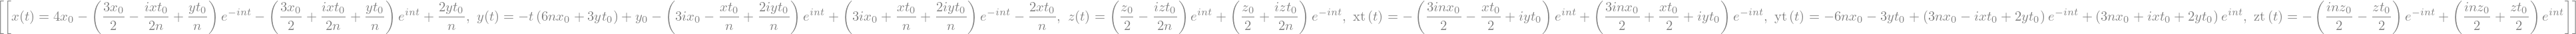

In [21]:
# linear model
eqs = [sp.Eq(xt(t), x(t).diff(t)),
       sp.Eq(yt(t), y(t).diff(t)),
       sp.Eq(zt(t), z(t).diff(t)),
       sp.Eq(xt(t).diff(t) - 2 * n * y(t).diff(t) - 3 * n**2 * x(t), 0), 
       sp.Eq(yt(t).diff(t) + 2 * n * x(t).diff(t), 0),
       sp.Eq(zt(t).diff(t) + n**2 * z(t), 0)]

general_solution = sp.solvers.ode.systems.dsolve_system(eqs, ics={x(0) : x0, y(0) : y0, z(0) : z0,
                                                xt(0) : xt0, yt(0) : yt0, zt(0) : zt0})

solution = sp.solvers.ode.systems.dsolve_system([eq.evalf(subs={n : n0}) for eq in eqs], ics={x(0) : 69780, y(0) : 139560, z(0) : 104670,
                                                xt(0) : 7.5579, yt(0) : -151.116, zt(0) : 15.116}, ) #example of initial conditions is taken from page 89

general_solution #for some internal reasons sympy outputs complex numbers in the solution, it should not be so. Although the computational solution (if we previously substitute "n") is right

In [22]:
chief_orbit = [sp.Eq(x(t), a0 * sp.cos(n * t)), sp.Eq(y(t), a0 * sp.sin(n * t)), sp.Eq(z(t), 0)]
chief_orbit

In [23]:
t_span = np.linspace(0, 2*np.pi/float(n0), 1000)
chief_orbit_plot = np.array([np.array([chief_orbit[0].rhs.evalf(subs={t : ti, a0 : r0}) for ti in t_span]),
                             np.array([chief_orbit[1].rhs.evalf(subs={t : ti, a0 : r0}) for ti in t_span]),
                             np.array([chief_orbit[2].rhs.evalf(subs={t : ti, a0 : r0}) for ti in t_span])])
rho = np.array([np.array([solution[0][0].rhs.evalf(subs={t : ti, a0 : r0}) for ti in t_span]),
                np.array([solution[0][1].rhs.evalf(subs={t : ti, a0 : r0}) for ti in t_span]),
                np.array([solution[0][2].rhs.evalf(subs={t : ti, a0 : r0}) for ti in t_span])])

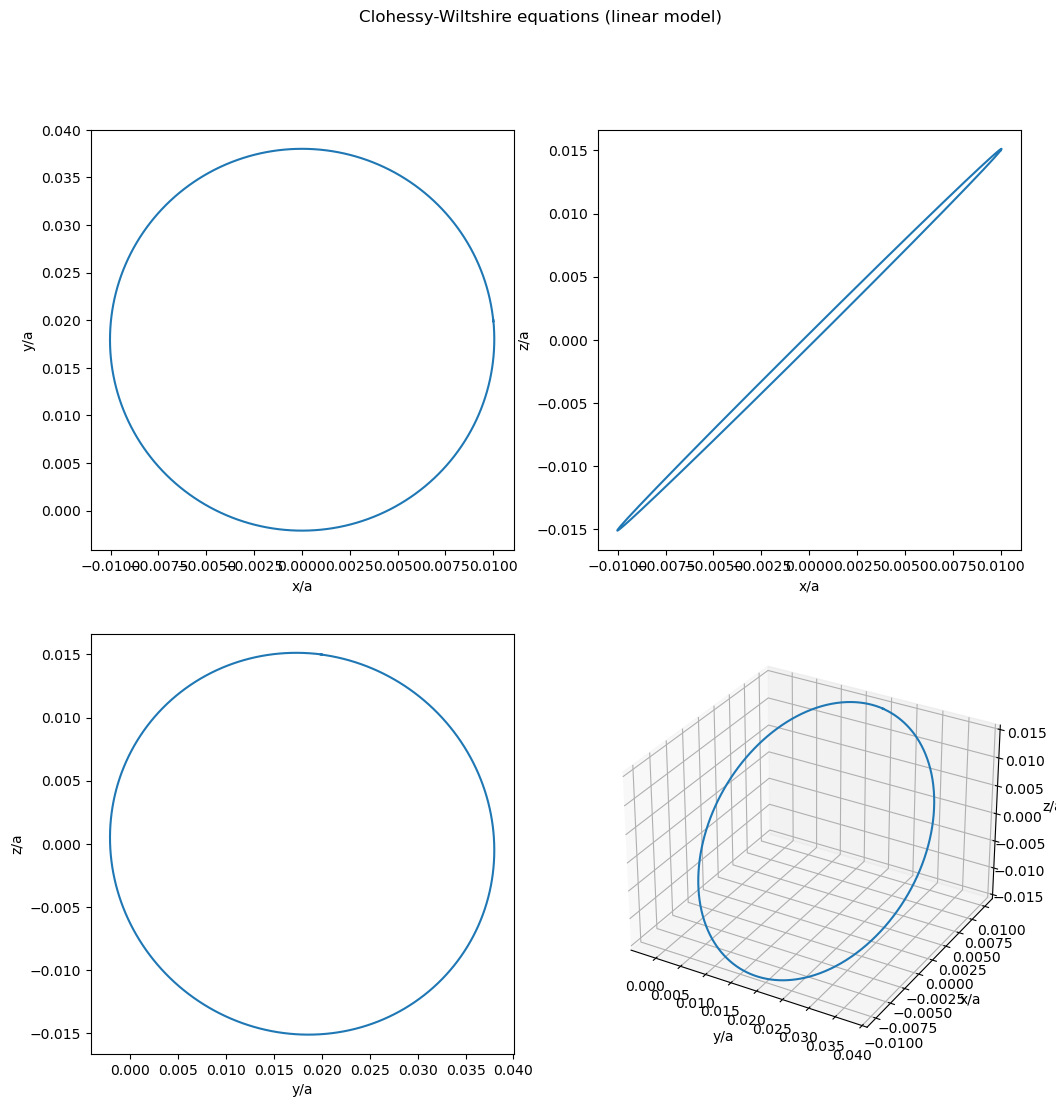

In [24]:
fig = plt.figure(figsize=(12, 12), dpi=100)
fig.suptitle("Clohessy-Wiltshire equations (linear model)")

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(rho[0] / r0, rho[1] / r0)
ax1.set_xlabel("x/a")
ax1.set_ylabel("y/a")

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(rho[0] / r0, rho[2] / r0)
ax2.set_xlabel("x/a")
ax2.set_ylabel("z/a")

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(rho[1] / r0, rho[2] / r0)
ax3.set_xlabel("y/a")
ax3.set_ylabel("z/a")

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.plot3D(rho[1] / r0, rho[0] / r0, rho[2] / r0)
ax4.set_xlabel("y/a")
ax4.set_ylabel("x/a")
ax4.set_zlabel("z/a")


#ax.legend(loc="upper left")
plt.show()

In [25]:
#non-linear model
#y = [x, y, z, xt, yt, zt]
def CWfunc(t, mas, n, mu, a0):
    out = np.zeros(6)
    x, y, z, xt, yt, zt = mas

    out[0] = xt
    out[1] = yt
    out[2] = zt

    out[3] = 2 * n * yt + n**2 * x - (mu * (a0 + x)) / ((a0 + x)**2 + y**2 + z**2)**(3/2) + mu / a0**2
    out[4] = -2 * n * xt + n**2 * y - (mu * y) / ((a0 + x)**2 + y**2 + z**2)**(3/2)
    out[5] = -(mu * z) / ((a0 + x)**2 + y**2 + z**2)**(3/2)

    return out

mas0 = [69780, 139560, 104670, 7.5579, -151.116, 15.116]

solution = solve_ivp(CWfunc, (0, 2 * (2*np.pi/float(n0))), mas0, args=(n0, 3.986e14, r0), max_step = (2*np.pi/float(n0)/1000))

print("number of samples: ", len(solution.t))

solution

number of samples:  2003


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.855e-01 ...  1.160e+04  1.160e+04]
        y: [[ 6.978e+04  6.978e+04 ...  7.102e+04  7.104e+04]
            [ 1.396e+05  1.395e+05 ...  2.464e+04  2.424e+04]
            ...
            [-1.511e+02 -1.511e+02 ... -1.510e+02 -1.510e+02]
            [ 1.512e+01  1.508e+01 ...  1.726e+01  1.695e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 12014
     njev: 0
      nlu: 0

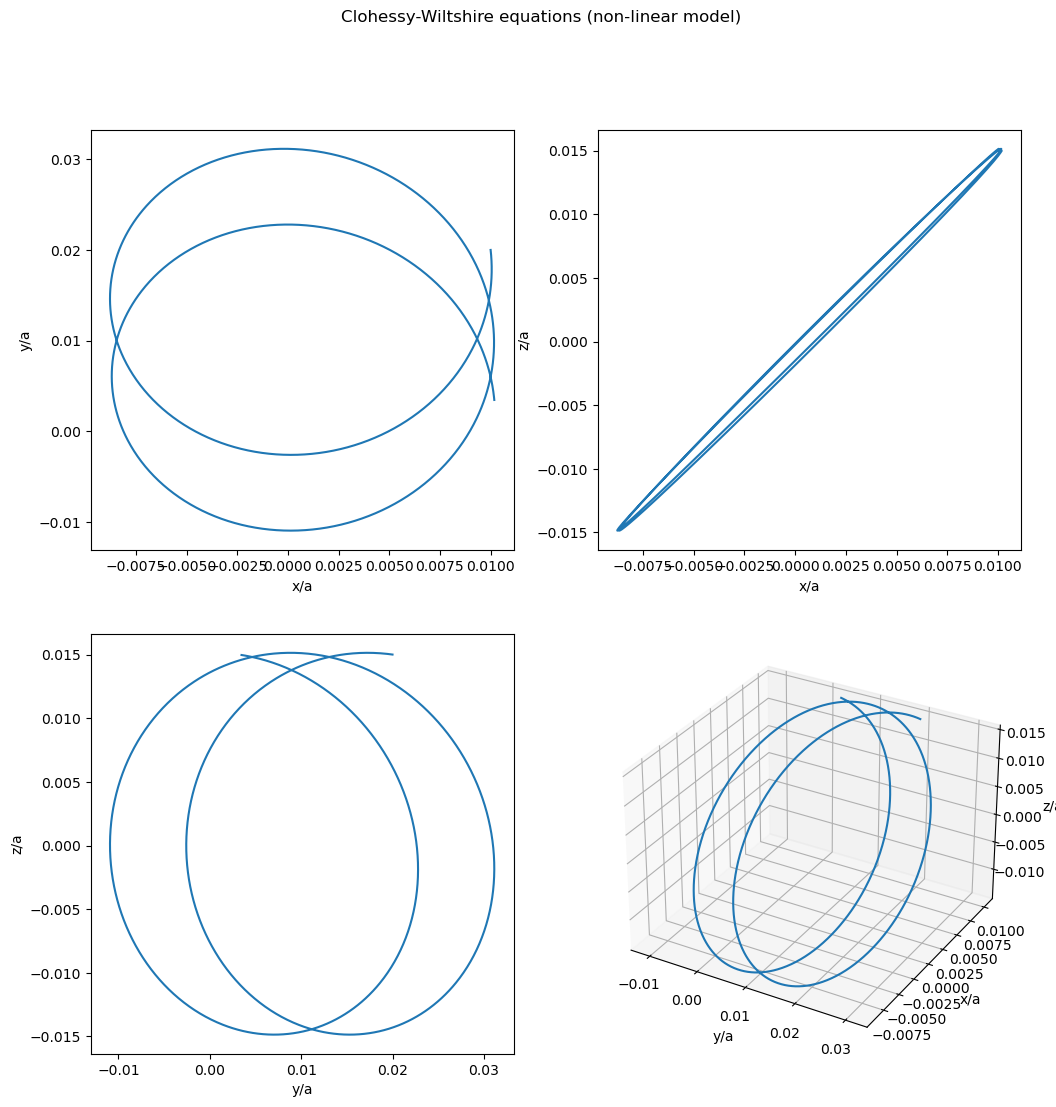

In [26]:
fig = plt.figure(figsize=(12, 12), dpi=100)
fig.suptitle("Clohessy-Wiltshire equations (non-linear model)")

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(solution.y[0] / r0, solution.y[1] / r0)
ax1.set_xlabel("x/a")
ax1.set_ylabel("y/a")

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(solution.y[0] / r0, solution.y[2] / r0)
ax2.set_xlabel("x/a")
ax2.set_ylabel("z/a")

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(solution.y[1] / r0, solution.y[2] / r0)
ax3.set_xlabel("y/a")
ax3.set_ylabel("z/a")

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.plot3D(solution.y[1] / r0, solution.y[0] / r0, solution.y[2] / r0)
ax4.set_xlabel("y/a")
ax4.set_ylabel("x/a")
ax4.set_zlabel("z/a")

plt.show()

In [27]:
#linear model with ode
#mas = [/*realtive orbit*/ x, y, z, xt, yt, zt, /*chief position*/ x1, y1, z1, xt1, yt1, zt1]
def CWfunc(t, mas, n):
    out = np.zeros(12)
    x, y, z, xt, yt, zt, x1, y1, z1, xt1, yt1, zt1 = mas

    out[0] = xt
    out[1] = yt
    out[2] = zt

    out[3] = 2 * n * yt + 3 * n**2 * x
    out[4] = -2 * n * xt
    out[5] = - n**2 * z

    out[6] = xt1
    out[7] = yt1
    out[8] = zt1

    out[9]  = - n**2 * x1
    out[10] = - n**2 * y1
    out[11] = - n**2 * z1

    return out

mas0 = [69780, 139560, 104670, 7.5579, -151.116, 15.116, r0, 0, 0, 0, r0 * n0, 0]

solution = solve_ivp(CWfunc, (0, (2*np.pi/float(n0))), mas0, args=(n0,), max_step = (2*np.pi/float(n0)/1000))

print("number of samples: ", len(solution.t))

solution

number of samples:  1009


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.742e-07 ...  5.799e+03  5.801e+03]
        y: [[69780 69780.00000282834 ... 69767.47177178036
             69779.99999999862]
            [139560 139559.99994344893 ... 139065.0766984745
             138816.81061355976]
            ...
            [7557.93520992552 7557.935209925521 ... 7557.923242268907
             7557.9352099253965]
            [0 0.0 ... 0.0 0.0]]
      sol: None
 t_events: None
 y_events: None
     nfev: 6050
     njev: 0
      nlu: 0

In [28]:
#calculating deputy position in ECI
deputy_pos = np.empty((3, 0))

for x, y, z, x1, y1, z1, xt1, yt1, zt1 in zip(solution.y[0], solution.y[1], solution.y[2], solution.y[6], solution.y[7], solution.y[8], solution.y[9], solution.y[10], solution.y[11]):
    ez = np.array([x1, y1, z1])
    ez = ez / np.linalg.norm(ez)
    ey = np.cross([x1, y1, z1], [xt1, yt1, zt1])
    ey = ey / np.linalg.norm(np.double(ey))
    ex = np.cross(ey, ez)

    A = np.vstack((ex, ey, ez)).T

    x0, y0, z0 = (A @ np.array([[x], [y], [z]]) + np.array([[x1], [y1], [z1]])).T[0]

    deputy_pos = np.concatenate((deputy_pos, [[x0], [y0], [z0]]), axis=1)
    

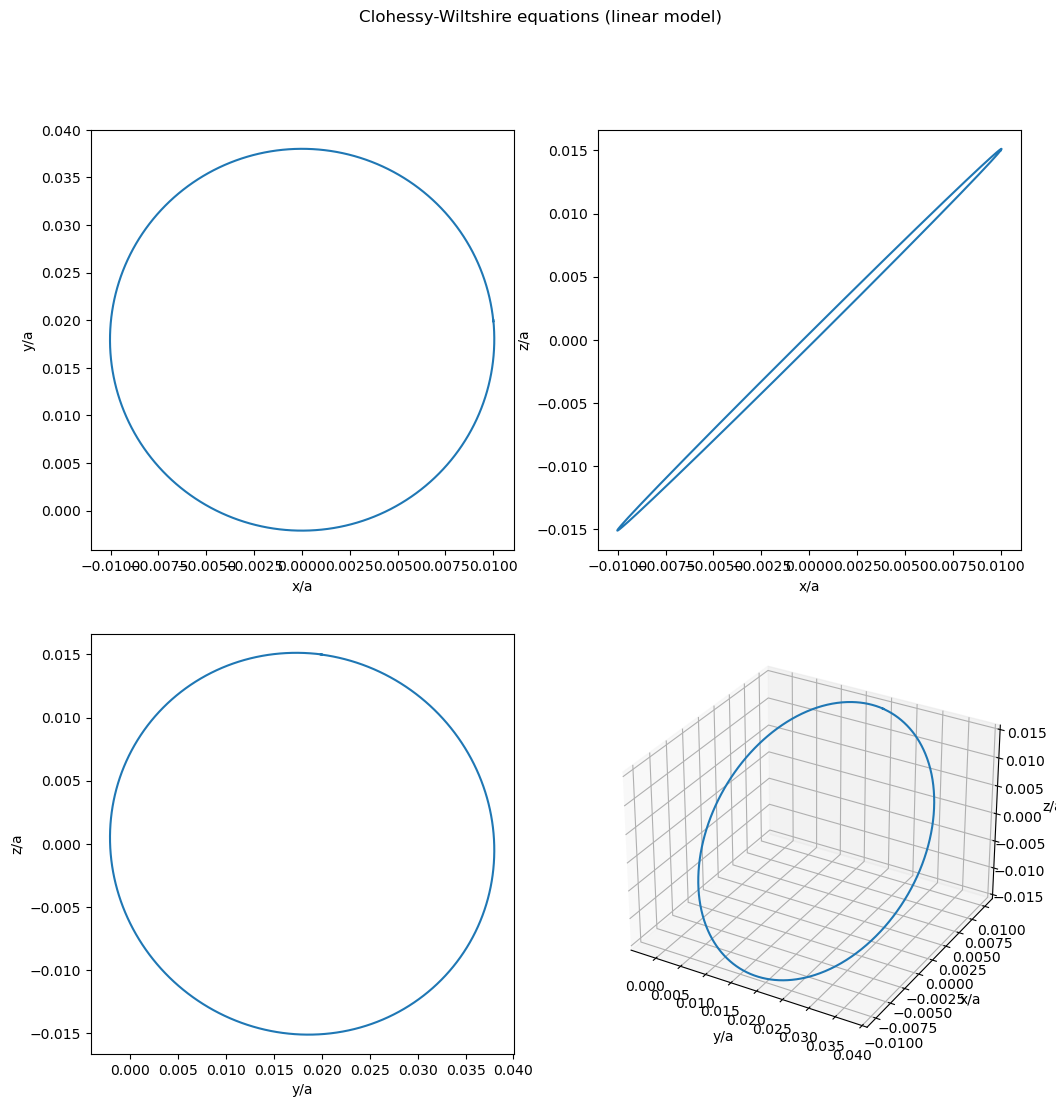

In [29]:
fig = plt.figure(figsize=(12, 12), dpi=100)
fig.suptitle("Clohessy-Wiltshire equations (linear model)")

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(solution.y[0] / r0, solution.y[1] / r0)
ax1.set_xlabel("x/a")
ax1.set_ylabel("y/a")

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(solution.y[0] / r0, solution.y[2] / r0)
ax2.set_xlabel("x/a")
ax2.set_ylabel("z/a")

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(solution.y[1] / r0, solution.y[2] / r0)
ax3.set_xlabel("y/a")
ax3.set_ylabel("z/a")

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.plot3D(solution.y[1] / r0, solution.y[0] / r0, solution.y[2] / r0)
ax4.set_xlabel("y/a")
ax4.set_ylabel("x/a")
ax4.set_zlabel("z/a")

plt.show()

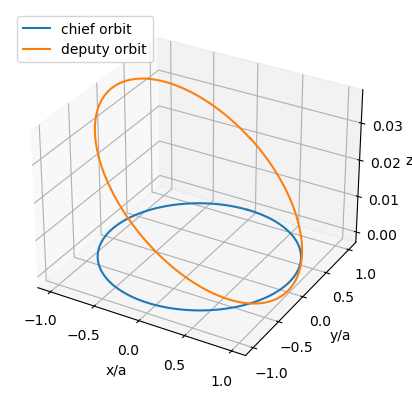

In [30]:
# deputy and chief orbits in ECI coordinate system
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot3D(solution.y[7] / r0, solution.y[6] / r0, solution.y[8] / r0, label="chief orbit")
ax.plot3D(deputy_pos[1] / r0, deputy_pos[0] / r0, deputy_pos[2] / r0, label="deputy orbit")
ax.set_xlabel("x/a")
ax.set_ylabel("y/a")
ax.set_zlabel("z/a")
ax.legend(loc="upper left")

plt.show()